In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d faysalmiah1721758/potato-dataset

Dataset URL: https://www.kaggle.com/datasets/faysalmiah1721758/potato-dataset
License(s): CC0-1.0
  0% 0.00/37.8M [00:00<?, ?B/s]
100% 37.8M/37.8M [00:00<00:00, 1.36GB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/potato-dataset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import tensorflow as tf
from tensorflow import keras
import random

In [5]:
DATADIR='/content/PotatoDisease'
CATEGORIES = ['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

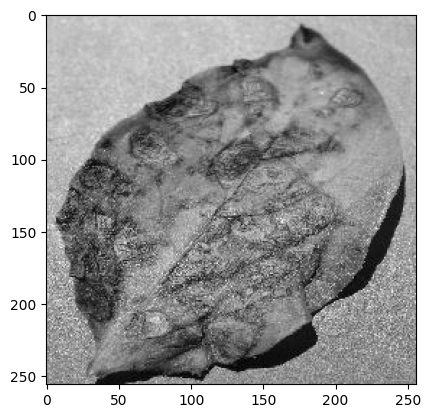

In [7]:
for category in CATEGORIES:
  path = os.path.join(DATADIR, category) # complete path
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
    plt.imshow(img_array, cmap = 'gray') # better memory
    plt.show()
    break
  break

array([[186, 190, 193, ..., 176, 180, 185],
       [185, 189, 191, ..., 183, 182, 183],
       [186, 188, 189, ..., 189, 182, 177],
       ...,
       [149, 123, 143, ..., 154, 124, 119],
       [131, 130, 149, ..., 118, 155, 122],
       [160, 141, 165, ..., 132, 127, 151]], dtype=uint8)
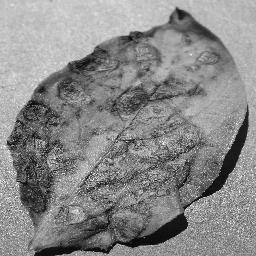

In [8]:
img_array

In [9]:
img_array.shape

(256, 256)

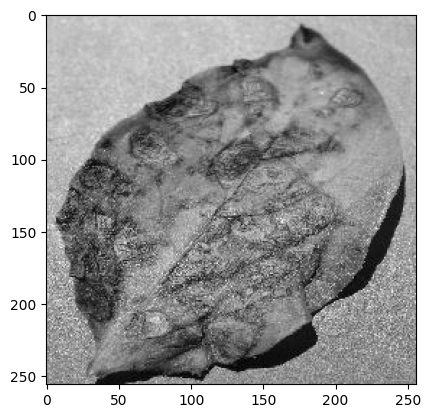

In [10]:
IMG_SIZE = 256
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap = 'gray')
plt.show()

Training DATA

In [12]:
training_data = []

def create_training_data():
  for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    class_num = CATEGORIES.index(category)  # numeric labeling
    for img in os.listdir(path):
      try:
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))   # resizing images
        training_data.append([new_array, class_num])
      except Exception as e:
        pass

create_training_data()



In [13]:
len(training_data)

2152

In [14]:
random.shuffle(training_data)

In [15]:
X= []
y= []

for features, label in training_data:
  X.append(features)
  y.append(label)


In [16]:
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1) # RGB 3
# -1 to let NumPy figure out the number of samples automatically
y= np.array(y)


In [17]:
X= X/255

Building CNN Model

In [25]:
model = keras.Sequential([
    # first conv layer
    keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=X.shape[1:]),
    # following by max pooling layer
    keras.layers.MaxPooling2D((2,2)),
    # dropout after first conv block to reduce overfitting
    keras.layers.Dropout(0.25),

    # 2nd conv layer
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    # dropout after second conv block
    keras.layers.Dropout(0.25),

    keras.layers.Flatten(), # because it's in 2D and we want it in 1D

    # hidden layer
    keras.layers.Dense(64, activation='relu'),
    # dropout before output
    keras.layers.Dropout(0.5),

    # output layer
    keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    X, y,
    batch_size=32,
    epochs=6,
    validation_split=0.1,
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/6
61/61 ━━━━━━━━━━━━━━━━━━━━ 12s 130ms/step - accuracy: 0.4774 - loss: 2.7962 - val_accuracy: 0.7778 - val_loss: 0.7991
Epoch 2/6
61/61 ━━━━━━━━━━━━━━━━━━━━ 15s 83ms/step - accuracy: 0.7614 - loss: 0.6755 - val_accuracy: 0.8565 - val_loss: 0.4339
Epoch 3/6
61/61 ━━━━━━━━━━━━━━━━━━━━ 10s 80ms/step - accuracy: 0.7782 - loss: 0.5684 - val_accuracy: 0.7685 - val_loss: 0.5642
Epoch 4/6
61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 80ms/step - accuracy: 0.8347 - loss: 0.4603 - val_accuracy: 0.8704 - val_loss: 0.3541
Epoch 5/6
61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 79ms/step - accuracy: 0.8818 - loss: 0.3396 - val_accuracy: 0.8472 - val_loss: 0.4964
Epoch 6/6
61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - accuracy: 0.8845 - loss: 0.3170 - val_accuracy: 0.9028 - val_loss: 0.2576


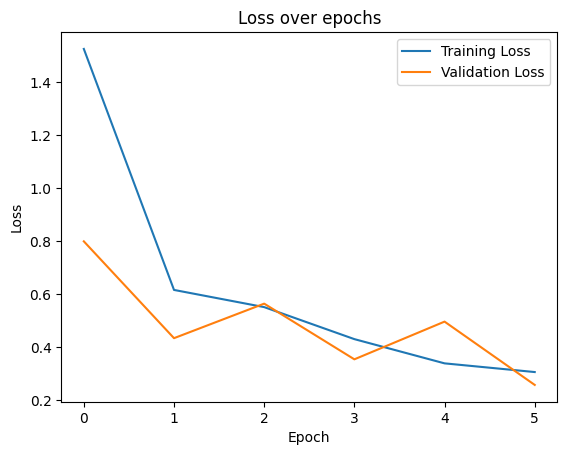

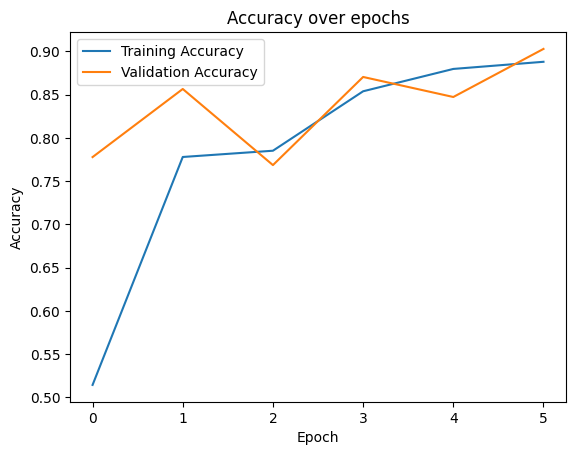

In [26]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Loss over epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Accuracy over epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

In [27]:
model.save("potato_disease_model.h5")
